In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
def bundle_plot(ax, bundle, legend=False, Q_err=False, xscale='log'):
    a_est = bundle['knee']['a_est']
    Q_app_fit = bundle['app_fit']['Q']
    I_app_fit = bundle['app_fit']['I']
    Q_hat_fit = bundle['hat_fit']['Q']
    I_hat_fit = bundle['hat_fit']['I']
    delta_I_hat_fit = bundle['hat_fit']['dI']
    T = bundle['meta']['T']
    Q_exp = bundle['exp']['Q']
    I_exp = bundle['exp']['I']
    delta_I_exp = bundle['exp'].get("dI", None)
    delta_Q_exp = bundle['exp'].get("dQ", None)

    handles = []
    legends = []
    # experimental data
    h = ax.errorbar(
        Q_exp,
        I_exp,
        yerr=delta_I_exp,
        xerr=delta_Q_exp if Q_err else None,
        fmt='o',
        color='k',
        fillstyle='none',
        alpha=0.3,
        markersize=4,
        capsize=2,
        label='Experimental data'
    )
    handles.append(h)
    legends.append('Experimental data')
    
    # knee position
    ax.axvline(1/a_est, color='gray', ls='--')

    # apparent fit
    h = ax.plot(
        Q_app_fit, I_app_fit,
        '-', color='r',
        zorder=4,
        label='Apparent fit'
    )
    handles.append(h[0])
    legends.append('Apparent fit')

    # reconstructed intrinsic intensity
    h = ax.plot(
        Q_hat_fit, np.array(I_hat_fit)*(1-T),
        '-', color='blue',
        zorder=5,
        label='Reconstructed intrinsic intensity'
    )
    handles.append(h[0])
    legends.append('Reconstructed intrinsic intensity')

    # uncertainty band
    ax.fill_between(
        Q_hat_fit,
        (np.array(I_hat_fit) - np.array(delta_I_hat_fit))*(1-T),
        (np.array(I_hat_fit) + np.array(delta_I_hat_fit))*(1-T),
        color='blue',
        alpha=0.3,
        step='mid',
        zorder=2,
    )
    
    ax.set_xscale(xscale)
    ax.set_xlabel(r'$Q~(\mathrm{\AA^{-1}})$', fontsize=20)
    ax.set_ylabel(r'$I(Q)~(\mathrm{cm^{-1}})$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=16)
    if legend:
        ax.legend(handles=handles, labels=legends, fontsize=10, frameon=False)

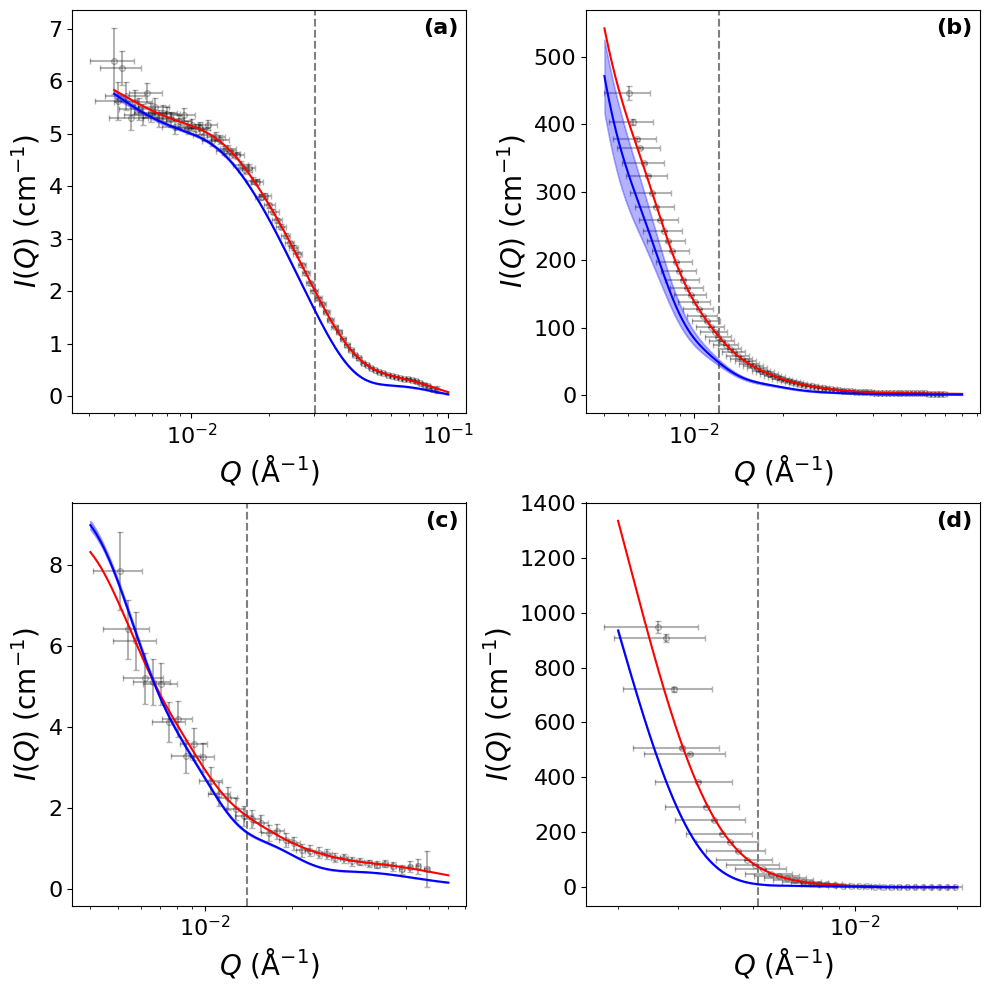

In [3]:
filenames_list = [
    "out_31144_10conf1.json",
    "out_30199_SDS100_conf1.json",
    "out_34658_2p5lp-12cs-1k_conf1_el.json",
    "out_33335_s0_35C_conf1.json"
]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
panel_labels = ['(a)', '(b)', '(c)', '(d)']
for ax, panel_label in zip(axs.flatten(), panel_labels):
    ax.text(0.98, 0.98, panel_label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

for filename in filenames_list:
    with open(filename, 'r') as f:
        bundle = json.load(f)
        
    ax = axs.flatten()[filenames_list.index(filename)]
    bundle_plot(ax, bundle, Q_err=True) 
    # ax.set_yscale('log')    
        
plt.tight_layout()

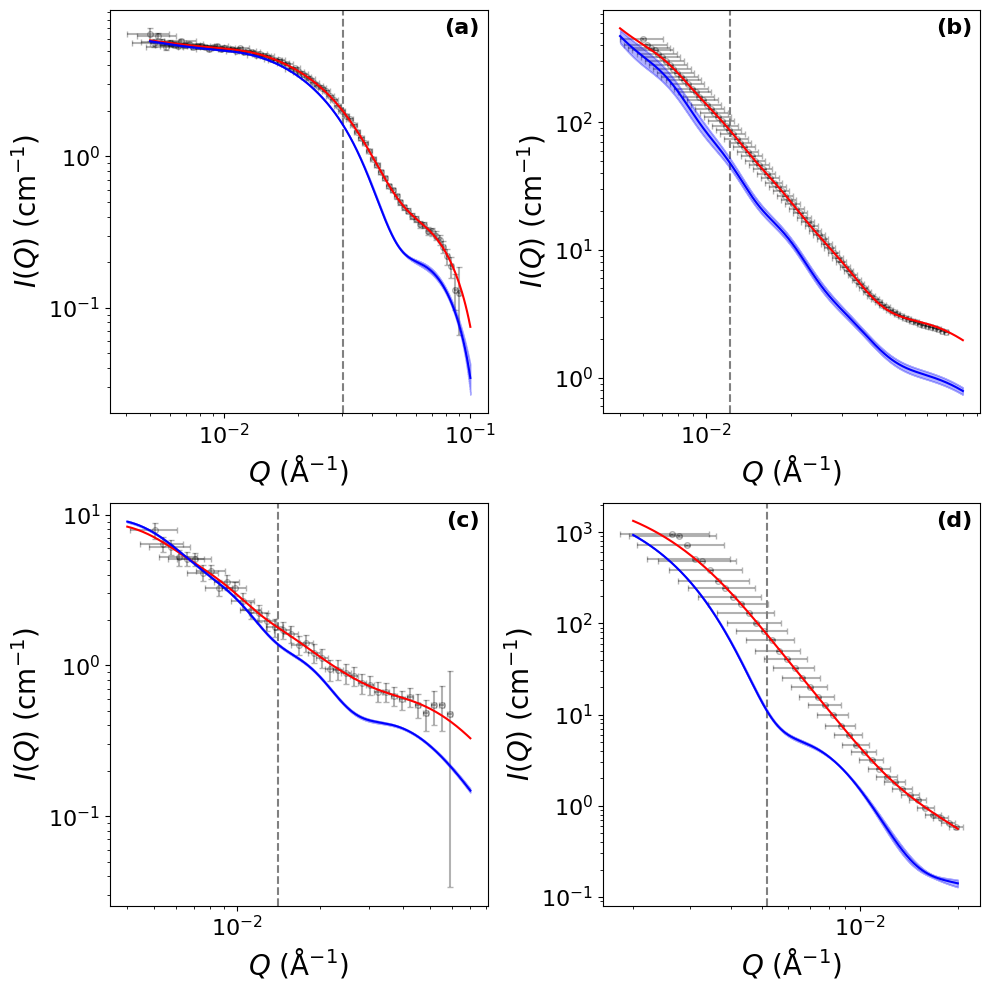

In [4]:
filenames_list = [
    "out_31144_10conf1.json",
    "out_30199_SDS100_conf1.json",
    "out_34658_2p5lp-12cs-1k_conf1_el.json",
    "out_33335_s0_35C_conf1.json"
]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
panel_labels = ['(a)', '(b)', '(c)', '(d)']
for ax, panel_label in zip(axs.flatten(), panel_labels):
    ax.text(0.98, 0.98, panel_label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

for filename in filenames_list:
    with open(filename, 'r') as f:
        bundle = json.load(f)
        
    ax = axs.flatten()[filenames_list.index(filename)]
    bundle_plot(ax, bundle, Q_err=True) 
    ax.set_yscale('log')    
        
plt.tight_layout()